# 2022년 제 2회 소방안전 AI 예측 경진대회

# 목차

### 1. 라이브러리 설치 및 불러오기

### 2. 데이터 전처리(1) 

### 3. 공간정보 시각화

### 4. 데이터 전처리(2)

### 5. 학습 데이터셋 및 머신러닝 예측 모델 생성

### 6. 모델 예측 결과 및 답안 작성


## 1. 라이브러리 설치 및 불러오기

#### > Library install

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install folium
# !pip install pyproj
# !pip install seaborn
# !pip install scikit-learn
# !pip install furl
# !pip install geopandas
# !pip install Rtree
# !pip install pygeos
# !pip install -U imbalanced-learn

#### > Library import

In [2]:
import numpy as np
import pandas as pd

## 공간정보 및 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import os
from folium.features import DivIcon
import folium
import pyproj
from pyproj import Proj, transform

## 경고 무시 명령
import warnings
warnings.filterwarnings(action='ignore')



## 모델적용을 위한 전처리 라이브러리
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, RandomizedSearchCV
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.decomposition import PCA, TruncatedSVD
from collections import Counter
from sklearn.metrics import classification_report

# 분류 모델 라이브러리(K-Nearest 모델)

from sklearn.neighbors import KNeighborsClassifier

# 모델 평가를 위한 라이브러리

from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
confusion_matrix, roc_auc_score, f1_score, average_precision_score
from sklearn.metrics import precision_recall_curve, roc_curve, \
precision_recall_curve, confusion_matrix


### < Dataset 변수 설명 >

0. GRID_ID : 격자ID
1. GRID_X_AXIS : 격자X좌표
2. GRID_Y_AXIS : 격자Y좌표
3.CRN_YMD : 발생일자
4. M00 : 남성10세미만
5. M10 : 남성10~14
6. M15 : 남성15~19
7. M20 : 남성20~24
8. M25 : 남성25~29
9. M30 : 남성30~34
10. M35 : 남성35~39
11. M40 : 남성40~44
12. M45 : 남성45~49
13. M50 : 남성50~54
14. M55 : 남성55~59
15. M60 : 남성60~64
16. M65 : 남성65~69
17. M70 : 남성70세이상
18. F00 : 여성10세미만
19. F10 : 여성10~14
20. F15 : 여성15~19
21. F20 : 여성20~24
22. F25 : 여성25~29
23. F30 : 여성30~34
24. F35 : 여성35~39
25. F40 : 여성40~44
26. F45 : 여성45~49
27. F50 : 여성50~54
28. F55 : 여성55~59
29. F60 : 여성60~64
30. F65 : 여성65~69
31. F70 : 여성70세이상
32. DONG_CD : 행정동코드
33. DONG_NM : 행정동명
34. HGTPOJ_ACDNT_OCRN_CNT : 고온체사고발생건수
35. PNTRINJ_OCRN_CNT : 관통상발생건수
36. MCHN_ACDNT_OCRN_CNT : 기계사고발생건수
37.ETC_OCRN_CNT : 기타발생건수
38. BLTRM_OCRN_CNT : 둔상발생건수
39. ACDNT_INJ_OCRN_CNT : 사고부상발생건수
40. EXCL_DISEASE_OCRN_CNT : 질병외발생건수
41. VHC_ACDNT_OCRN_CNT : 탈것사고발생건수
42. HRFAF_OCRN_CNT : 낙상발생건수
43. AGRCMCHN_ACDNT_OCRN_CNT : 농기계사고발생건수
44. DRKNSTAT_OCRN_CNT : 단순주취발생건수
45. ANML_INSCT_ACDNT_OCRN_CNT : 동물곤충사고발생건수
46. FLPS_ACDNT_OCRN_CNT : 동승자사고발생건수
47. UNKNWN_OCRN_CNT : 미상발생건수
48. PDST_ACDNT_OCRN_CNT : 보행자사고발생건수
49. LACRTWND_OCRN_CNT : 열상발생건수
50. MTRCYC_ACDNT_OCRN_CNT : 오토바이사고발생건수
51. THML_DAMG_OCRN_CNT : 온열손상발생건수
52. DRV_ACDNT_OCRN_CNT : 운전자사고발생건수
53. DRWNG_OCRN_CNT : 익수발생건수
54. PRGNTW_ACDNT_OCRN_CNT : 임산부사고발생건수
55. BCYC_ACDNT_OCRN_CNT : 자전거사고발생건수
56. ELTRC_ACDNT_OCRN_CNT : 전기사고발생건수
57. POSNG_OCRN_CNT : 중독발생건수
58. ASPHYXIA_OCRN_CNT : 질식발생건수
59. FALLING_OCRN_CNT : 추락발생건수
60. FLAME_OCRN_CNT : 화염발생건수
61.CHMC_SBSTNC_ACDNT_OCRN_CNT : 화학물질사고발생건수
62. WETHR_ACDNT_OCRN_CNT : 날씨사고발생건수
63. SXAL_ASALT_OCRN_CNT : 성폭행발생건수
64. BURN_OCRN_CNT : 화상발생건수

#### >> 사용할 DataSet : '02.dataset.csv'

In [3]:
DF = pd.read_csv('02.dataset.csv', encoding = 'euc-kr')
DF

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,OCRN_YMD,M00,M10,M15,M20,M25,M30,...,BCYC_ACDNT_OCRN_CNT,ELTRC_ACDNT_OCRN_CNT,POSNG_OCRN_CNT,ASPHYXIA_OCRN_CNT,FALLING_OCRN_CNT,FLAME_OCRN_CNT,CHMC_SBSTNC_ACDNT_OCRN_CNT,WETHR_ACDNT_OCRN_CNT,SXAL_ASALT_OCRN_CNT,BURN_OCRN_CNT
0,378508,378475,508475,2021-01-01,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,378509,378475,509475,2021-01-01,0.00,0.00,0.4,0.00,0.27,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,378510,378475,510475,2021-01-01,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,378511,378475,511475,2021-01-01,0.08,0.08,0.2,0.39,0.16,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,378512,378475,512475,2021-01-01,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302163,417521,417475,521475,2021-12-30,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302164,418517,418475,517475,2021-12-30,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302165,418518,418475,518475,2021-12-30,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302166,418519,418475,519475,2021-12-30,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### >> DataSet 세부사항 파악

In [4]:
DF.shape

(302168, 65)

In [5]:
DF.columns

Index(['GRID_ID', 'GRID_X_AXIS', 'GRID_Y_AXIS', 'OCRN_YMD', 'M00', 'M10',
       'M15', 'M20', 'M25', 'M30', 'M35', 'M40', 'M45', 'M50', 'M55', 'M60',
       'M65', 'M70', 'F00', 'F10', 'F15', 'F20', 'F25', 'F30', 'F35', 'F40',
       'F45', 'F50', 'F55', 'F60', 'F65', 'F70', 'DONG_CD', 'DONG_NM',
       'HGTPOJ_ACDNT_OCRN_CNT', 'PNTRINJ_OCRN_CNT', 'MCHN_ACDNT_OCRN_CNT',
       'ETC_OCRN_CNT', 'BLTRM_OCRN_CNT', 'ACDNT_INJ_OCRN_CNT',
       'EXCL_DISEASE_OCRN_CNT', 'VHC_ACDNT_OCRN_CNT', 'HRFAF_OCRN_CNT',
       'AGRCMCHN_ACDNT_OCRN_CNT', 'DRKNSTAT_OCRN_CNT',
       'ANML_INSCT_ACDNT_OCRN_CNT', 'FLPS_ACDNT_OCRN_CNT', 'UNKNWN_OCRN_CNT',
       'PDST_ACDNT_OCRN_CNT', 'LACRTWND_OCRN_CNT', 'MTRCYC_ACDNT_OCRN_CNT',
       'THML_DAMG_OCRN_CNT', 'DRV_ACDNT_OCRN_CNT', 'DRWNG_OCRN_CNT',
       'PRGNTW_ACDNT_OCRN_CNT', 'BCYC_ACDNT_OCRN_CNT', 'ELTRC_ACDNT_OCRN_CNT',
       'POSNG_OCRN_CNT', 'ASPHYXIA_OCRN_CNT', 'FALLING_OCRN_CNT',
       'FLAME_OCRN_CNT', 'CHMC_SBSTNC_ACDNT_OCRN_CNT', 'WETHR_ACDNT_

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302168 entries, 0 to 302167
Data columns (total 65 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GRID_ID                     302168 non-null  int64  
 1   GRID_X_AXIS                 302168 non-null  int64  
 2   GRID_Y_AXIS                 302168 non-null  int64  
 3   OCRN_YMD                    302168 non-null  object 
 4   M00                         302168 non-null  float64
 5   M10                         302168 non-null  float64
 6   M15                         302168 non-null  float64
 7   M20                         302168 non-null  float64
 8   M25                         302168 non-null  float64
 9   M30                         302168 non-null  float64
 10  M35                         302168 non-null  float64
 11  M40                         302168 non-null  float64
 12  M45                         302168 non-null  float64
 13  M50           

In [7]:
# null값이 없는 것을 확인
DF.isnull().sum()

GRID_ID                       0
GRID_X_AXIS                   0
GRID_Y_AXIS                   0
OCRN_YMD                      0
M00                           0
                             ..
FLAME_OCRN_CNT                0
CHMC_SBSTNC_ACDNT_OCRN_CNT    0
WETHR_ACDNT_OCRN_CNT          0
SXAL_ASALT_OCRN_CNT           0
BURN_OCRN_CNT                 0
Length: 65, dtype: int64

In [8]:
DF.describe()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,M00,M10,M15,M20,M25,M30,M35,...,BCYC_ACDNT_OCRN_CNT,ELTRC_ACDNT_OCRN_CNT,POSNG_OCRN_CNT,ASPHYXIA_OCRN_CNT,FALLING_OCRN_CNT,FLAME_OCRN_CNT,CHMC_SBSTNC_ACDNT_OCRN_CNT,WETHR_ACDNT_OCRN_CNT,SXAL_ASALT_OCRN_CNT,BURN_OCRN_CNT
count,302168.000000,302168.000000,302168.000000,302168.000000,302168.000000,302168.000000,302168.000000,302168.000000,302168.000000,302168.000000,...,302168.000000,302168.000000,302168.000000,302168.000000,302168.000000,302168.000000,302168.000000,302168.0,302168.0,302168.000000
mean,393874.438084,393826.635514,523277.570093,18.742905,39.280078,56.934226,108.415764,132.298048,109.834970,106.759611,...,0.000304,0.000003,0.000281,0.000036,0.000248,0.000013,0.000003,0.0,0.0,0.000007
std,9567.726970,9566.993065,9041.045158,101.171821,207.873529,295.132547,521.291677,671.963387,538.590764,519.003592,...,0.017635,0.001819,0.016966,0.006033,0.015753,0.003638,0.001819,0.0,0.0,0.002573
min,378508.000000,378475.000000,505475.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,385534.750000,385475.000000,516475.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,392530.500000,392475.000000,522475.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,401516.250000,401475.000000,530475.000000,0.000000,0.000000,0.050000,0.530000,1.090000,0.820000,1.050000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,418520.000000,418475.000000,544475.000000,2530.480000,3186.910000,5969.100000,9616.610000,10751.320000,9515.460000,9995.430000,...,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


#### >> 1년간 사고별 발생 건수 탐색

In [9]:
DF.loc[:, 'HGTPOJ_ACDNT_OCRN_CNT' : 'BURN_OCRN_CNT'].sum()

HGTPOJ_ACDNT_OCRN_CNT           4.0
PNTRINJ_OCRN_CNT                1.0
MCHN_ACDNT_OCRN_CNT            27.0
ETC_OCRN_CNT                  111.0
BLTRM_OCRN_CNT                 44.0
ACDNT_INJ_OCRN_CNT            126.0
EXCL_DISEASE_OCRN_CNT         239.0
VHC_ACDNT_OCRN_CNT             28.0
HRFAF_OCRN_CNT                981.0
AGRCMCHN_ACDNT_OCRN_CNT         0.0
DRKNSTAT_OCRN_CNT              58.0
ANML_INSCT_ACDNT_OCRN_CNT      67.0
FLPS_ACDNT_OCRN_CNT           107.0
UNKNWN_OCRN_CNT                 5.0
PDST_ACDNT_OCRN_CNT           158.0
LACRTWND_OCRN_CNT             176.0
MTRCYC_ACDNT_OCRN_CNT         181.0
THML_DAMG_OCRN_CNT              6.0
DRV_ACDNT_OCRN_CNT            216.0
DRWNG_OCRN_CNT                 13.0
PRGNTW_ACDNT_OCRN_CNT           8.0
BCYC_ACDNT_OCRN_CNT            92.0
ELTRC_ACDNT_OCRN_CNT            1.0
POSNG_OCRN_CNT                 85.0
ASPHYXIA_OCRN_CNT              11.0
FALLING_OCRN_CNT               75.0
FLAME_OCRN_CNT                  4.0
CHMC_SBSTNC_ACDNT_OCRN_CNT  

#### >> Histogram 으로 시각화 - 사고 유형 별 총 발생 건수

<AxesSubplot: >

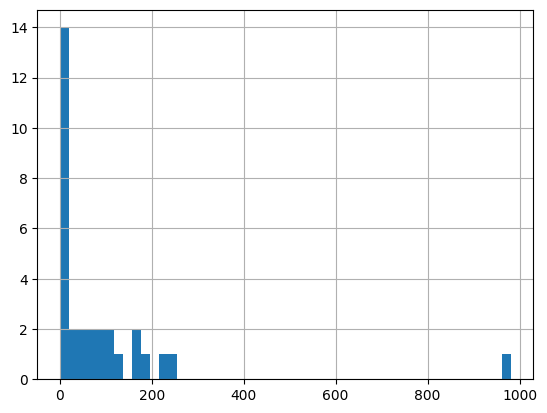

In [10]:
DF.loc[:, 'HGTPOJ_ACDNT_OCRN_CNT' : 'BURN_OCRN_CNT'].sum().hist(bins=50)

In [11]:
DF.loc[:, 'HGTPOJ_ACDNT_OCRN_CNT' : 'BURN_OCRN_CNT'].sum().describe() 

count     31.000000
mean      91.193548
std      179.791624
min        0.000000
25%        4.000000
50%       28.000000
75%      109.000000
max      981.000000
dtype: float64

## 2. 데이터 전처리(1)

#### >> 각 사고 유형별 50% 미만의 사고 유형 데이터 삭제
#### 1년 중 28건(50%) 이하로 발생하는 사고 유형은 모델을 적용함에 있어서 큰 영향을 주지 않을 것 으로 판단
#### > 16건의 사고유형을 추출

In [12]:
DF1 = DF.loc[:, ['GRID_ID', 'GRID_X_AXIS', 'GRID_Y_AXIS' ,'OCRN_YMD', 'ETC_OCRN_CNT', 'BLTRM_OCRN_CNT', 'ACDNT_INJ_OCRN_CNT', 'EXCL_DISEASE_OCRN_CNT', 'VHC_ACDNT_OCRN_CNT', 'HRFAF_OCRN_CNT', 'DRKNSTAT_OCRN_CNT', 'ANML_INSCT_ACDNT_OCRN_CNT', 'FLPS_ACDNT_OCRN_CNT', 'PDST_ACDNT_OCRN_CNT', 'LACRTWND_OCRN_CNT', 'MTRCYC_ACDNT_OCRN_CNT', 'DRV_ACDNT_OCRN_CNT', 'BCYC_ACDNT_OCRN_CNT', 'POSNG_OCRN_CNT', 'FALLING_OCRN_CNT']]
DF1

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,OCRN_YMD,ETC_OCRN_CNT,BLTRM_OCRN_CNT,ACDNT_INJ_OCRN_CNT,EXCL_DISEASE_OCRN_CNT,VHC_ACDNT_OCRN_CNT,HRFAF_OCRN_CNT,DRKNSTAT_OCRN_CNT,ANML_INSCT_ACDNT_OCRN_CNT,FLPS_ACDNT_OCRN_CNT,PDST_ACDNT_OCRN_CNT,LACRTWND_OCRN_CNT,MTRCYC_ACDNT_OCRN_CNT,DRV_ACDNT_OCRN_CNT,BCYC_ACDNT_OCRN_CNT,POSNG_OCRN_CNT,FALLING_OCRN_CNT
0,378508,378475,508475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,378509,378475,509475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,378510,378475,510475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,378511,378475,511475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,378512,378475,512475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302163,417521,417475,521475,2021-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302164,418517,418475,517475,2021-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302165,418518,418475,518475,2021-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302166,418519,418475,519475,2021-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# 발생 건수가 가장 많은 사고유형 순서로 16건을 추출
# 'key : value' 형태로 사고유형을 숫자로 재정의 
DF1.rename(columns = {'ETC_OCRN_CNT' : 0, 'BLTRM_OCRN_CNT' : 1, 'ACDNT_INJ_OCRN_CNT' : 2, 
                      'EXCL_DISEASE_OCRN_CNT' : 3, 'VHC_ACDNT_OCRN_CNT' : 4, 'HRFAF_OCRN_CNT' : 5,
                      'DRKNSTAT_OCRN_CNT' : 6, 'ANML_INSCT_ACDNT_OCRN_CNT' : 7, 'FLPS_ACDNT_OCRN_CNT' : 8,
                      'PDST_ACDNT_OCRN_CNT' : 9, 'LACRTWND_OCRN_CNT' : 10, 'MTRCYC_ACDNT_OCRN_CNT' : 11,
                      'DRV_ACDNT_OCRN_CNT' : 12, 'BCYC_ACDNT_OCRN_CNT' : 13, 'POSNG_OCRN_CNT' : 14,
                      'FALLING_OCRN_CNT' : 15}, inplace = True)

In [14]:
#DF1에 격자별 인구 총합 column인 'TOTAL_HUM' 생성
#DF1에 격자별 아동 인구 총합 columns인 'CHLD_HUM' 생성
#DF1에 격자별 노인 인구 총합 columns인 'OLD_HUM' 생성

DF1['TOTAL_HUM'] = DF.loc[:, 'M00':'F70'].sum(axis=1)
DF1['CHLD_HUM'] = DF.loc[:, ['M00', 'M15', 'F00', 'F15']].sum(axis=1)
DF1['OLD_HUM'] = DF.loc[:, ['M65', 'M70', 'F65', 'F70']].sum(axis=1)

#### >> 사람이 거주하지 않는 격자는 사고도 발생하지 않을 것이다 <<

In [15]:
#DF1에 격자별 인구수 총합이 0 인 index drop
idx = DF1[DF1['TOTAL_HUM'] == 0].index
DF1 = DF1.drop(idx)
DF1

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,OCRN_YMD,0,1,2,3,4,5,...,9,10,11,12,13,14,15,TOTAL_HUM,CHLD_HUM,OLD_HUM
1,378509,378475,509475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.22,0.66,0.90
3,378511,378475,511475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.76,0.37,0.96
5,378513,378475,513475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.81,9.82,21.10
6,378514,378475,514475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.27,0.00,0.61
23,379518,379475,518475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,226.16,12.48,6.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276406,407513,407475,513475,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.17,0.17,3.90
276407,407514,407475,514475,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,265.78,3.36,78.27
276422,408515,408475,515475,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.88,0.47,5.39
276479,417517,417475,517475,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.23,0.08,1.12


In [16]:
# TOTAL_HUM column 삭제
DF2 = DF1.drop(columns = 'TOTAL_HUM')
DF2

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,OCRN_YMD,0,1,2,3,4,5,...,8,9,10,11,12,13,14,15,CHLD_HUM,OLD_HUM
1,378509,378475,509475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.66,0.90
3,378511,378475,511475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.37,0.96
5,378513,378475,513475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.82,21.10
6,378514,378475,514475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.61
23,379518,379475,518475,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.48,6.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276406,407513,407475,513475,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17,3.90
276407,407514,407475,514475,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.36,78.27
276422,408515,408475,515475,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.47,5.39
276479,417517,417475,517475,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,1.12


In [17]:
#GRID_X_AXIS, GRID_Y_AXIS column 삭제
DF2 = DF2.iloc[:, :].drop(columns = ['GRID_X_AXIS', 'GRID_Y_AXIS'])
DF2

,GRID_ID,OCRN_YMD,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,CHLD_HUM,OLD_HUM
1,378509,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.66,0.90
3,378511,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.37,0.96
5,378513,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.82,21.10
6,378514,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.61
23,379518,2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.48,6.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276406,407513,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17,3.90
276407,407514,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.36,78.27
276422,408515,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.47,5.39
276479,417517,2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,1.12


In [18]:
#ACDNT_type column을 생성하고, 사고 유형들을 데이터로 삽입
DF2 = pd.DataFrame((DF2.set_index(['GRID_ID', 'OCRN_YMD', 'CHLD_HUM', 'OLD_HUM'])).stack()).reset_index()
DF2.rename(columns = {'level_4' : 'ACDNT_type'}, inplace = True)
DF2.rename(columns = {0 : 'CNT'}, inplace = True)
DF2

,GRID_ID,OCRN_YMD,CHLD_HUM,OLD_HUM,ACDNT_type,CNT
0,378509,2021-01-01,0.66,0.90,0,0.0
1,378509,2021-01-01,0.66,0.90,1,0.0
2,378509,2021-01-01,0.66,0.90,2,0.0
3,378509,2021-01-01,0.66,0.90,3,0.0
4,378509,2021-01-01,0.66,0.90,4,0.0
...,...,...,...,...,...,...
1564251,417518,2021-11-29,0.25,2.32,11,0.0
1564252,417518,2021-11-29,0.25,2.32,12,0.0
1564253,417518,2021-11-29,0.25,2.32,13,0.0
1564254,417518,2021-11-29,0.25,2.32,14,0.0


In [19]:
# 1년간 사고 발생 건수가 28 이상인 사고 유형으로 새로운 데이터프레임(DF1) 생성
DF1.loc[:, 0 : 15].sum()

0     111.0
1      44.0
2     126.0
3     239.0
4      28.0
5     981.0
6      58.0
7      67.0
8     107.0
9     158.0
10    176.0
11    181.0
12    216.0
13     92.0
14     85.0
15     75.0
dtype: float64

In [20]:
DF.loc[:, 'M00':'F70'].sum(axis=1).describe()

count    302168.000000
mean       2529.394878
std       12191.551496
min           0.000000
25%           0.000000
50%           0.000000
75%          42.070000
max      162381.740000
dtype: float64

In [21]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564256 entries, 0 to 1564255
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   GRID_ID     1564256 non-null  int64  
 1   OCRN_YMD    1564256 non-null  object 
 2   CHLD_HUM    1564256 non-null  float64
 3   OLD_HUM     1564256 non-null  float64
 4   ACDNT_type  1564256 non-null  int64  
 5   CNT         1564256 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 71.6+ MB


In [22]:
# 타입 변환 함수 (int,object to datetime)
def toDatetime(i_ymd):
    i_ymd = i_ymd.astype('str')
    return pd.to_datetime(i_ymd)

# 타입 변환 함수 (datetime to object)
def to_object(dt_ymd):
    return dt_ymd.astype('str')

In [23]:
# 'YMD' 컬럼 타입 변환 (int to datetime)
DF2['OCRN_YMD'] = toDatetime(DF2['OCRN_YMD'])

# 'MONTH', 'DAY' 컬럼 추가
DF2['MONTH'] = DF2['OCRN_YMD'].dt.month
DF2['DAY'] = DF2['OCRN_YMD'].dt.day

# 'YMD' 컬럼 타입 변환 (datetime to object)
DF2['OCRN_YMD'] = to_object(DF2['OCRN_YMD'])

In [24]:
DF2

,GRID_ID,OCRN_YMD,CHLD_HUM,OLD_HUM,ACDNT_type,CNT,MONTH,DAY
0,378509,2021-01-01,0.66,0.90,0,0.0,1,1
1,378509,2021-01-01,0.66,0.90,1,0.0,1,1
2,378509,2021-01-01,0.66,0.90,2,0.0,1,1
3,378509,2021-01-01,0.66,0.90,3,0.0,1,1
4,378509,2021-01-01,0.66,0.90,4,0.0,1,1
...,...,...,...,...,...,...,...,...
1564251,417518,2021-11-29,0.25,2.32,11,0.0,11,29
1564252,417518,2021-11-29,0.25,2.32,12,0.0,11,29
1564253,417518,2021-11-29,0.25,2.32,13,0.0,11,29
1564254,417518,2021-11-29,0.25,2.32,14,0.0,11,29


In [25]:
DF2.isnull().sum()

GRID_ID       0
OCRN_YMD      0
CHLD_HUM      0
OLD_HUM       0
ACDNT_type    0
CNT           0
MONTH         0
DAY           0
dtype: int64

#### >> 사고유형 대부분의 경우, 강수량이 영향을 끼칠 것으로 예상 <<

In [26]:
#기상청 홈페이지를 통해 날씨데이터 불러옴
climate = pd.read_csv('climate.csv')

In [27]:
climate['Precipitation'].fillna(0, inplace=True)

In [28]:
climate

,OCRN_YMD,Precipitation
0,2021-01-01,0.0
1,2021-01-02,0.0
2,2021-01-03,0.0
3,2021-01-04,0.0
4,2021-01-05,0.0
...,...,...
360,2021-12-27,0.0
361,2021-12-28,0.0
362,2021-12-29,0.0
363,2021-12-30,0.0


In [29]:
DF2 = pd.merge(DF2, climate, on = ['OCRN_YMD'])

In [30]:
DF2

,GRID_ID,OCRN_YMD,CHLD_HUM,OLD_HUM,ACDNT_type,CNT,MONTH,DAY,Precipitation
0,378509,2021-01-01,0.66,0.90,0,0.0,1,1,0.0
1,378509,2021-01-01,0.66,0.90,1,0.0,1,1,0.0
2,378509,2021-01-01,0.66,0.90,2,0.0,1,1,0.0
3,378509,2021-01-01,0.66,0.90,3,0.0,1,1,0.0
4,378509,2021-01-01,0.66,0.90,4,0.0,1,1,0.0
...,...,...,...,...,...,...,...,...,...
1564251,417518,2021-11-29,0.25,2.32,11,0.0,11,29,0.0
1564252,417518,2021-11-29,0.25,2.32,12,0.0,11,29,0.0
1564253,417518,2021-11-29,0.25,2.32,13,0.0,11,29,0.0
1564254,417518,2021-11-29,0.25,2.32,14,0.0,11,29,0.0


## 3. 공간정보 시각화

#### >> 지리적 데이터 시각화(KATEC 격자 지도)

In [31]:
def katec_to_wgs84(x, y):
    inProj  = Proj('+proj=tmerc +lat_0=38 +lon_0=128 +k=0.9999 +x_0=400000 +y_0=600000 +ellps=bessel +units=m +no_defs +towgs84=-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43')
    outProj = Proj({ 'proj':'latlong', 'datum':'WGS84', 'ellps':'WGS84' })
    return transform( inProj, outProj, x, y )

In [32]:
datadf = DF1

In [33]:
datadf['TOTAL_CNT'] = datadf.loc[:, 0:15].sum(axis=1)

In [34]:
DF_GEO = datadf[['GRID_ID', 'GRID_X_AXIS', 'GRID_Y_AXIS','TOTAL_CNT']].groupby(['GRID_ID', 'GRID_X_AXIS', 'GRID_Y_AXIS']).sum().reset_index()
DF_GEO

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TOTAL_CNT
0,378509,378475,509475,0.0
1,378511,378475,511475,0.0
2,378512,378475,512475,0.0
3,378513,378475,513475,0.0
4,378514,378475,514475,1.0
...,...,...,...,...
470,417516,417475,516475,0.0
471,417517,417475,517475,0.0
472,417518,417475,518475,0.0
473,417521,417475,521475,0.0


In [35]:
DF_GEO.TOTAL_CNT.sum()

2744.0

In [36]:
DF_GEO.TOTAL_CNT.value_counts()

0.0      240
1.0       72
2.0       34
3.0       24
4.0       16
5.0        8
8.0        7
7.0        6
6.0        6
12.0       6
10.0       5
21.0       3
16.0       3
36.0       3
76.0       3
9.0        3
22.0       2
11.0       2
18.0       2
29.0       2
15.0       2
14.0       2
13.0       1
44.0       1
17.0       1
28.0       1
35.0       1
20.0       1
67.0       1
66.0       1
74.0       1
93.0       1
19.0       1
62.0       1
142.0      1
99.0       1
85.0       1
97.0       1
61.0       1
49.0       1
64.0       1
25.0       1
91.0       1
71.0       1
54.0       1
104.0      1
Name: TOTAL_CNT, dtype: int64

In [37]:
DF_GEO.TOTAL_CNT.describe()

count    475.000000
mean       5.776842
std       16.672342
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max      142.000000
Name: TOTAL_CNT, dtype: float64

In [38]:
def f_color(x):
    if x > 80:       # 빨강색
        a = '#FF4F00'     
    elif x > 30:     # 주황색   
        a = '#FCB100' 
    elif x > 10:     # 5건이상 노란색
        a = '#E0F500' 
    elif x > 1:      # 1건이상 연두색
        a = '#8CF700'  
    else:            # 0건  회색
        a = '#C6C6C6'
    return a

In [39]:
DF_GEO['cell_color']= DF_GEO['TOTAL_CNT'].apply(lambda x : f_color(x))
geodf = DF_GEO.rename(columns = {'GRID_ID' : 'id','GRID_X_AXIS':'x', 'GRID_Y_AXIS':'y', 'TOTAL_CNT':'total'})
geodf = geodf[['id','x','y','cell_color','total']]

In [40]:
cell_size = 1000
a = cell_size//2
geodf['nwx'], geodf['nwy'] = geodf['x']-a, geodf['y']+a
geodf['nex'], geodf['ney'] = geodf['x']+a, geodf['y']+a
geodf['swx'], geodf['swy'] = geodf['x']-a, geodf['y']-a
geodf['sex'], geodf['sey'] = geodf['x']+a ,geodf['y']-a

geodf['lng'], geodf['lat'] = katec_to_wgs84(geodf.x.to_list(), geodf.y.to_list())
geodf['nwlng'], geodf['nwlat'] = katec_to_wgs84(geodf.nwx.to_list(), geodf.nwy.to_list())
geodf['nelng'], geodf['nelat'] = katec_to_wgs84(geodf.nex.to_list(), geodf.ney.to_list())
geodf['swlng'], geodf['swlat'] = katec_to_wgs84(geodf.swx.to_list(), geodf.swy.to_list())
geodf['selng'], geodf['selat'] = katec_to_wgs84(geodf.sex.to_list(), geodf.sey.to_list())


In [41]:
geodf

,id,x,y,cell_color,total,nwx,nwy,nex,ney,swx,...,lng,lat,nwlng,nwlat,nelng,nelat,swlng,swlat,selng,selat
0,378509,378475,509475,#C6C6C6,0.0,377975,509975,378975,509975,377975,...,127.755373,37.186805,127.749727,37.191299,127.760991,37.191322,127.749756,37.182288,127.761019,37.182311
1,378511,378475,511475,#C6C6C6,0.0,377975,511975,378975,511975,377975,...,127.755315,37.204827,127.749668,37.209321,127.760934,37.209345,127.749697,37.200310,127.760962,37.200333
2,378512,378475,512475,#C6C6C6,0.0,377975,512975,378975,512975,377975,...,127.755286,37.213839,127.749638,37.218333,127.760906,37.218356,127.749668,37.209321,127.760934,37.209345
3,378513,378475,513475,#C6C6C6,0.0,377975,513975,378975,513975,377975,...,127.755258,37.222850,127.749609,37.227344,127.760878,37.227367,127.749638,37.218333,127.760906,37.218356
4,378514,378475,514475,#C6C6C6,1.0,377975,514975,378975,514975,377975,...,127.755229,37.231861,127.749579,37.236355,127.760849,37.236378,127.749609,37.227344,127.760878,37.227367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,417516,417475,516475,#C6C6C6,0.0,416975,516975,417975,516975,416975,...,128.194799,37.249971,128.189174,37.254486,128.200447,37.254467,128.189151,37.245475,128.200423,37.245456
471,417517,417475,517475,#C6C6C6,0.0,416975,517975,417975,517975,416975,...,128.194822,37.258983,128.189197,37.263497,128.200471,37.263479,128.189174,37.254486,128.200447,37.254467
472,417518,417475,518475,#C6C6C6,0.0,416975,518975,417975,518975,416975,...,128.194845,37.267994,128.189219,37.272509,128.200495,37.272490,128.189197,37.263497,128.200471,37.263479
473,417521,417475,521475,#C6C6C6,0.0,416975,521975,417975,521975,416975,...,128.194916,37.295027,128.189287,37.299542,128.200567,37.299523,128.189265,37.290531,128.200543,37.290512


In [42]:
cell_size = 1000
a = cell_size//2
geodf['nwx'], geodf['nwy'] = geodf['x']-a, geodf['y']+a
geodf['nex'], geodf['ney'] = geodf['x']+a, geodf['y']+a
geodf['swx'], geodf['swy'] = geodf['x']-a, geodf['y']-a
geodf['sex'], geodf['sey'] = geodf['x']+a ,geodf['y']-a

geodf['lng'], geodf['lat'] = katec_to_wgs84(geodf.x.to_list(), geodf.y.to_list())
geodf['nwlng'], geodf['nwlat'] = katec_to_wgs84(geodf.nwx.to_list(), geodf.nwy.to_list())
geodf['nelng'], geodf['nelat'] = katec_to_wgs84(geodf.nex.to_list(), geodf.ney.to_list())
geodf['swlng'], geodf['swlat'] = katec_to_wgs84(geodf.swx.to_list(), geodf.swy.to_list())
geodf['selng'], geodf['selat'] = katec_to_wgs84(geodf.sex.to_list(), geodf.sey.to_list())

map = folium.Map(location=[geodf['lat'].mean(), geodf['lng'].mean()], zoom_start=11)

geodf.apply(lambda x : folium.Polygon(locations=[[x.nwlat,x.nwlng], [x.swlat,x.swlng], [x.selat,x.selng], [x.nelat,x.nelng]], 
                                        color='white', 
                                        popup = 'id:'+ str(x.id),
                                        weight=0.1,
                                        fill=True,
                                        fill_color=x.cell_color,
                                        fill_opacity=0.6
                                        ).add_to(map), axis =1)

#map.save('heatmap.html')
map

## 4. 데이터 전처리(2)

#### >> 분류 모델 생성 시 '사고 발생건수'가 1 이상인 경우 1 할당,   0인경우 0 할당

가설 1 : 격자당 노인, 아동 주거 지수가 높은 곳일 수록 낙상사고, 열상사고 발생률이 높을 것이다.

가설 2 : 강수량이 많을 수록 자동차사고, 오토바이사고 발생률이 높을 것이다.

가설 3 : 격자당 노인 주거 지수가 높은 곳일 수록 질병외사고 발생률이 높을 것이다.
   ##### 따라서, 가장 공통점이 많은 'CHLD_HUM', 'OLD_HUM', 'Precipitation' 변수를 생성

In [43]:
DF2['target'] = np.where(DF2['CNT'] >= 1, 1,0)

In [44]:
DF2['target'].value_counts()

0    1561560
1       2696
Name: target, dtype: int64

In [45]:
DF2.columns

Index(['GRID_ID', 'OCRN_YMD', 'CHLD_HUM', 'OLD_HUM', 'ACDNT_type', 'CNT',
       'MONTH', 'DAY', 'Precipitation', 'target'],
      dtype='object')

In [46]:
DF_t = DF2[['GRID_ID', 'MONTH', 'DAY', 'ACDNT_type', 'Precipitation', 'CHLD_HUM','OLD_HUM', 'target']]
DF_t

,GRID_ID,MONTH,DAY,ACDNT_type,Precipitation,CHLD_HUM,OLD_HUM,target
0,378509,1,1,0,0.0,0.66,0.90,0
1,378509,1,1,1,0.0,0.66,0.90,0
2,378509,1,1,2,0.0,0.66,0.90,0
3,378509,1,1,3,0.0,0.66,0.90,0
4,378509,1,1,4,0.0,0.66,0.90,0
...,...,...,...,...,...,...,...,...
1564251,417518,11,29,11,0.0,0.25,2.32,0
1564252,417518,11,29,12,0.0,0.25,2.32,0
1564253,417518,11,29,13,0.0,0.25,2.32,0
1564254,417518,11,29,14,0.0,0.25,2.32,0


In [47]:
print('No ACDNT : ', round(DF_t['target'].value_counts()[0]/len(DF2) * 100, 2), '%')
print('ACDNT : ', round(DF_t['target'].value_counts()[1]/len(DF2) * 100, 2), '%')

No ACDNT :  99.83 %
ACDNT :  0.17 %


Text(0.5, 1.0, 'Class Distributions \n (0: No ACDNT || 1: ACDNT)')

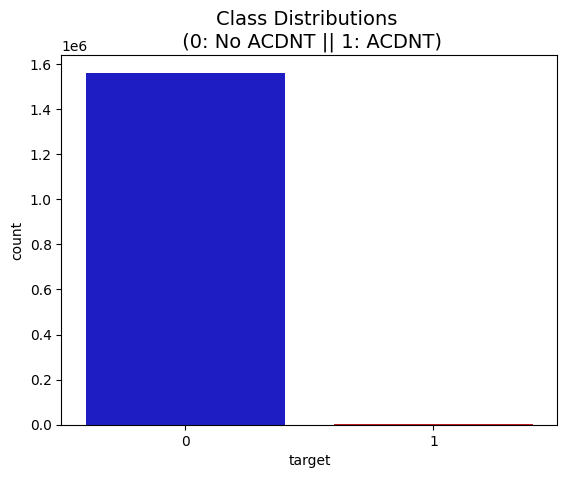

In [48]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x= 'target', data=DF_t, palette=colors)
plt.title('Class Distributions \n (0: No ACDNT || 1: ACDNT)', fontsize=14)

### Scaling & Encoding

- MinMaxScaler() - 'ACDNT_type','Precipitation','OLD_HUM','CHLD_HUM'
- 데이터 값을 0 과 1 사이의 범위 값으로 변환 (음수 값이 있으면 -1 에서 1값으로 변환

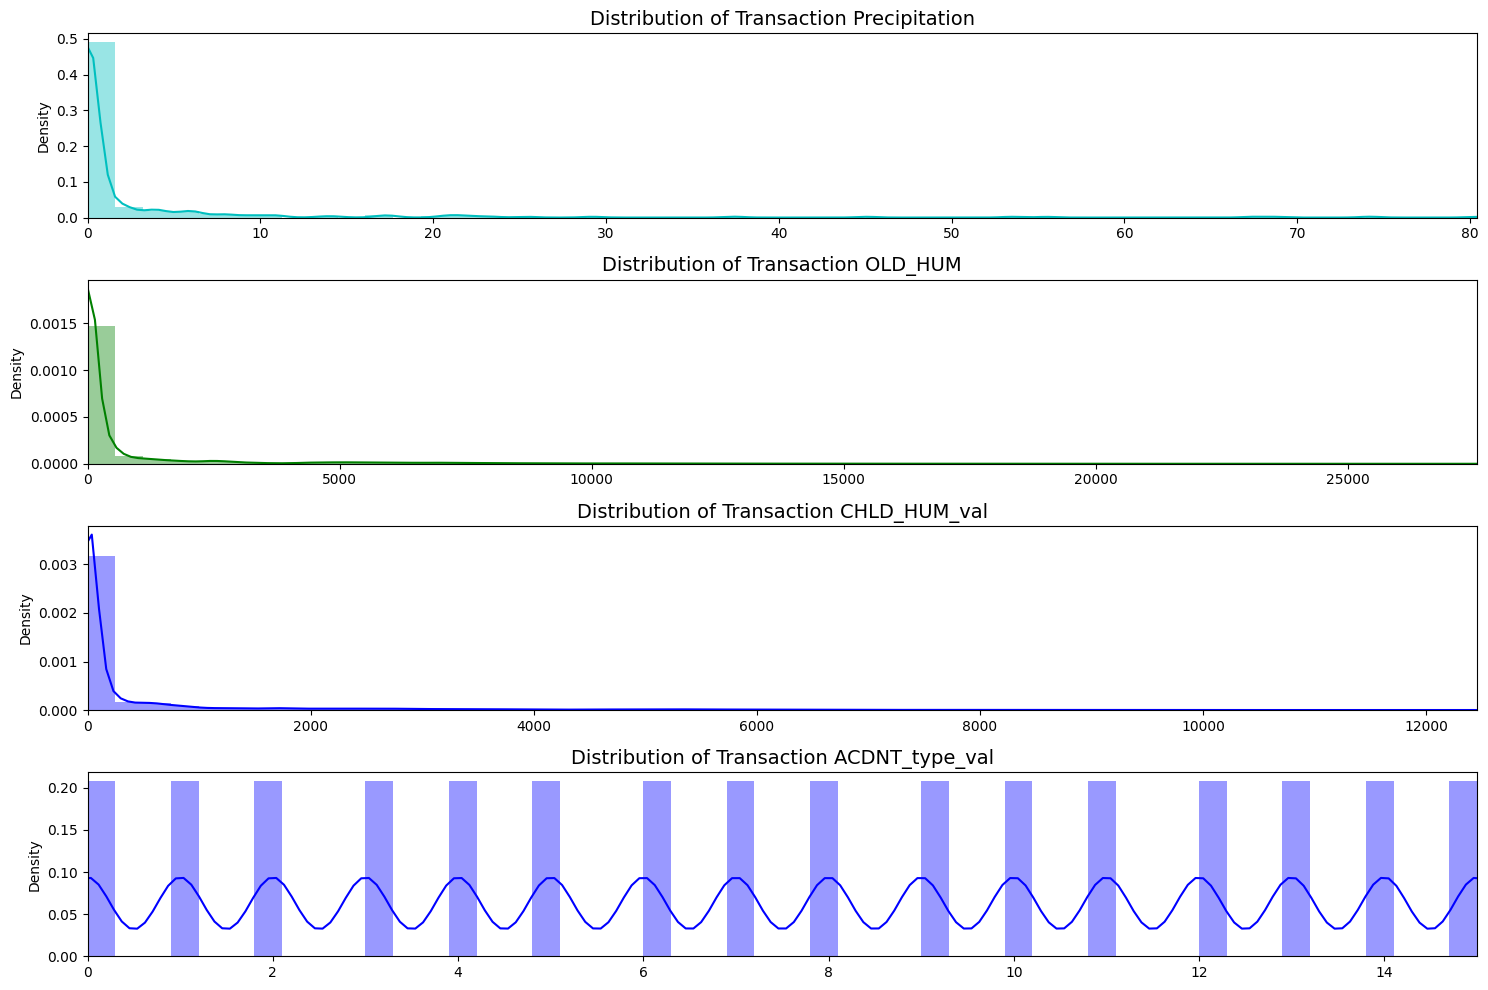

In [49]:
fig, ax = plt.subplots(4, 1, figsize=(15,10))

ACDNT_type_val = DF_t['ACDNT_type'].values
Precipitation_val = DF_t['Precipitation'].values
OLD_HUM_val = DF_t['OLD_HUM'].values
CHLD_HUM_val = DF_t['CHLD_HUM'].values

sns.distplot(Precipitation_val, ax=ax[0], color='c')
ax[0].set_title('Distribution of Transaction Precipitation', fontsize=14)
ax[0].set_xlim([min(Precipitation_val), max(Precipitation_val)])

sns.distplot(OLD_HUM_val, ax=ax[1], color='g')
ax[1].set_title('Distribution of Transaction OLD_HUM', fontsize=14)
ax[1].set_xlim([min(OLD_HUM_val), max(OLD_HUM_val)])

sns.distplot(CHLD_HUM_val, ax=ax[2], color='b')
ax[2].set_title('Distribution of Transaction CHLD_HUM_val', fontsize=14)
ax[2].set_xlim([min(CHLD_HUM_val), max(CHLD_HUM_val)])

sns.distplot(ACDNT_type_val, ax=ax[3], color='b')
ax[3].set_title('Distribution of Transaction ACDNT_type_val', fontsize=14)
ax[3].set_xlim([min(ACDNT_type_val), max(ACDNT_type_val)])

fig.tight_layout()
plt.show()

In [50]:
DF_t.head()

,GRID_ID,MONTH,DAY,ACDNT_type,Precipitation,CHLD_HUM,OLD_HUM,target
0,378509,1,1,0,0.0,0.66,0.9,0
1,378509,1,1,1,0.0,0.66,0.9,0
2,378509,1,1,2,0.0,0.66,0.9,0
3,378509,1,1,3,0.0,0.66,0.9,0
4,378509,1,1,4,0.0,0.66,0.9,0


In [51]:
minmax_scaler = MinMaxScaler()

DF_t['Precipitation'] = minmax_scaler.fit_transform(DF_t['Precipitation'].values.reshape(-1,1))
DF_t['OLD_HUM'] = minmax_scaler.fit_transform(DF_t['OLD_HUM'].values.reshape(-1,1))
DF_t['CHLD_HUM'] = minmax_scaler.fit_transform(DF_t['CHLD_HUM'].values.reshape(-1,1))

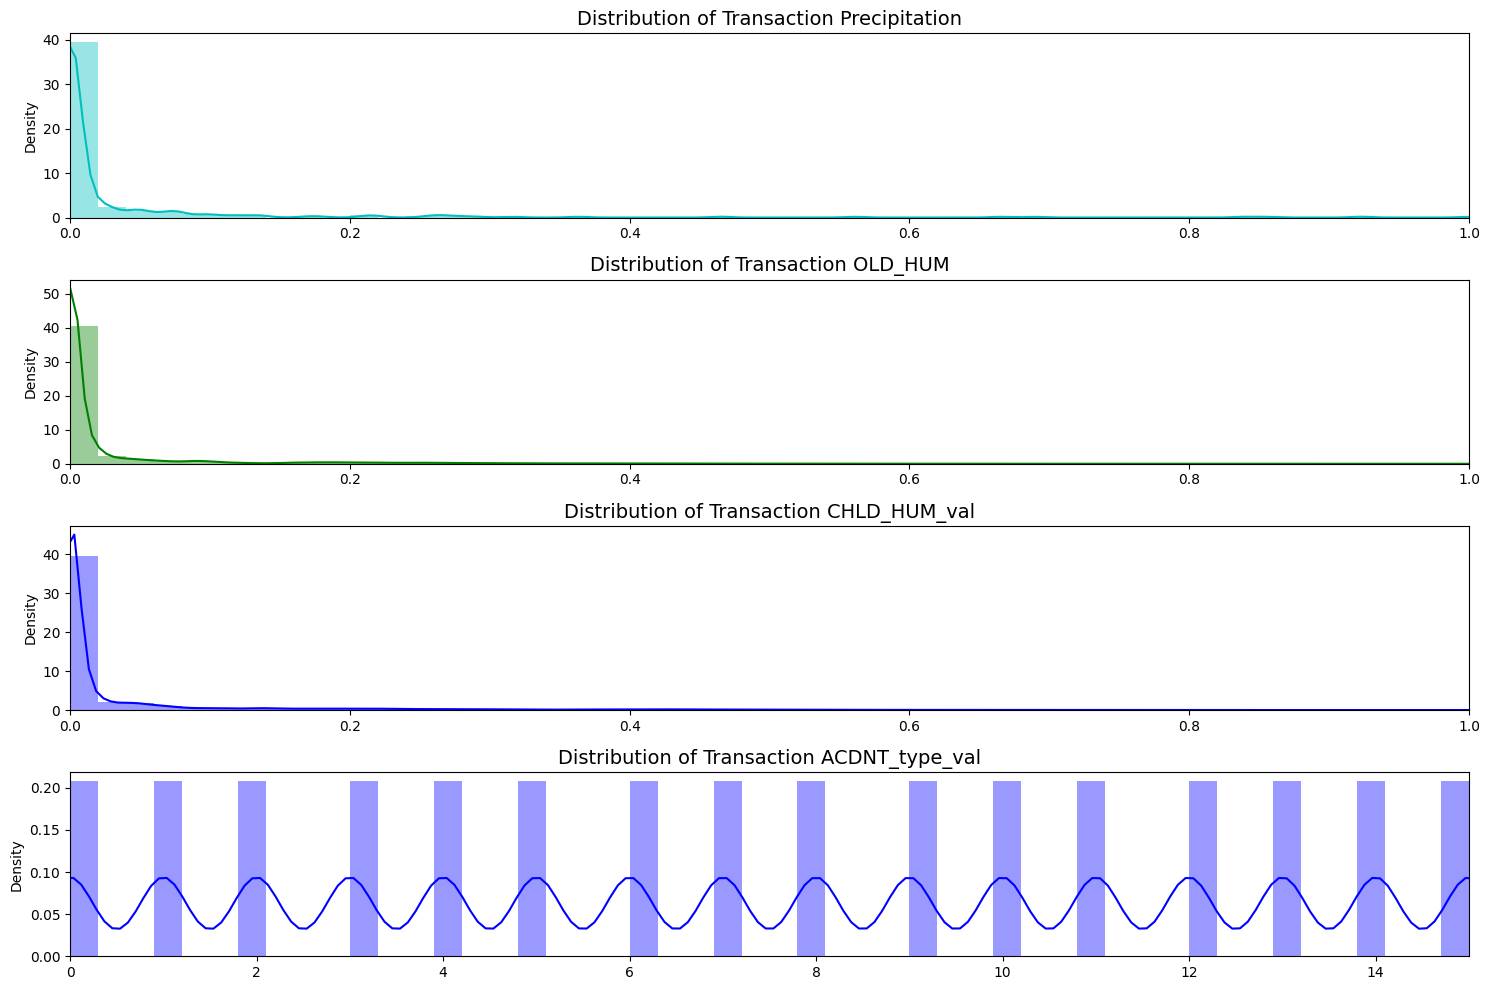

In [52]:
fig, ax = plt.subplots(4, 1, figsize=(15,10))

ACDNT_type_val = DF_t['ACDNT_type'].values
Precipitation_val = DF_t['Precipitation'].values
OLD_HUM_val = DF_t['OLD_HUM'].values
CHLD_HUM_val = DF_t['CHLD_HUM'].values

sns.distplot(Precipitation_val, ax=ax[0], color='c')
ax[0].set_title('Distribution of Transaction Precipitation', fontsize=14)
ax[0].set_xlim([min(Precipitation_val), max(Precipitation_val)])

sns.distplot(OLD_HUM_val, ax=ax[1], color='g')
ax[1].set_title('Distribution of Transaction OLD_HUM', fontsize=14)
ax[1].set_xlim([min(OLD_HUM_val), max(OLD_HUM_val)])

sns.distplot(CHLD_HUM_val, ax=ax[2], color='b')
ax[2].set_title('Distribution of Transaction CHLD_HUM_val', fontsize=14)
ax[2].set_xlim([min(CHLD_HUM_val), max(CHLD_HUM_val)])

sns.distplot(ACDNT_type_val, ax=ax[3], color='b')
ax[3].set_title('Distribution of Transaction ACDNT_type_val', fontsize=14)
ax[3].set_xlim([min(ACDNT_type_val), max(ACDNT_type_val)])

fig.tight_layout()
plt.show()

### < 파생변수 최종 도출 >

모델에 적용되는 최종 변수

1. GRID_ID : 격자 ID
2. MONTH : 월
3. DAY : 일
4. OLD_HUM : 격자별 노인 인구 지수
5. CHLD_HUM : 격자별 아동 인구 지수
6. Precipitation : 강수량
7. ACDNT_type : 사고 유형

## 5. 학습 데이터셋 및 머신러닝 예측 모델 생성

In [53]:
print('No ACDNT : ', round(DF_t['target'].value_counts()[0]/len(DF_t) * 100,2), '%')
print('ACDNT : ', round(DF_t['target'].value_counts()[1]/len(DF_t) * 100,2), '%')

X = DF_t.drop('target', axis=1)
y = DF_t['target']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

## 교차검증을 위한 data split
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False) # StratifiedKFold - KFOLD 교차검증

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

## train set과 test set이 기존 df의 dsp 0,1 비율과 같은 비율로 나누어졌는지 확인 
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No ACDNT :  99.83 %
ACDNT :  0.17 %
Train: [ 312823  312824  312825 ... 1564253 1564254 1564255] Test: [     0      1      2 ... 329242 329410 329445]
Train: [      0       1       2 ... 1564253 1564254 1564255] Test: [312823 312824 312825 ... 650197 650429 651235]
Train: [      0       1       2 ... 1564253 1564254 1564255] Test: [625660 625661 625662 ... 945589 945798 945800]
Train: [      0       1       2 ... 1564253 1564254 1564255] Test: [ 938543  938544  938545 ... 1268924 1269509 1269512]
Train: [      0       1       2 ... 1268924 1269509 1269512] Test: [1251375 1251376 1251377 ... 1564253 1564254 1564255]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827634 0.00172366]
[0.99827714 0.00172286]


In [54]:
# 사고유형 발생건수가 0인값과 1인 값 개수 확인
DF2['target'].value_counts()

0    1561560
1       2696
Name: target, dtype: int64


#### > 사고유형 발생건수 0과 1 값의 비율을 같게 맞추는 과정

In [55]:
# 데이터 shuffle
DF_t = DF_t.sample(frac=1) 

# CNT가 1인 갯수(2696) 만큼 데이터 생성
ACDNT_df = DF_t.loc[DF_t['target'] == 1]
non_ACDNT_df = DF_t.loc[DF_t['target'] == 0][:2696]

normal_distributed_df = pd.concat([ACDNT_df, non_ACDNT_df])

# df 행 shuffle
sub_df = normal_distributed_df.sample(frac=1, random_state=42)

sub_df.head()

,GRID_ID,MONTH,DAY,ACDNT_type,Precipitation,CHLD_HUM,OLD_HUM,target
274597,379524,3,6,5,0.0,0.000000,0.000038,0
832326,395531,7,2,6,0.0,0.229565,0.267482,0
514333,379528,4,26,13,0.0,0.000000,0.000033,0
1240635,395527,9,24,11,0.0,0.216037,0.824803,1
721931,391508,6,9,11,0.0,0.000641,0.001758,0


In [56]:
sub_df

,GRID_ID,MONTH,DAY,ACDNT_type,Precipitation,CHLD_HUM,OLD_HUM,target
274597,379524,3,6,5,0.000000,0.000000,0.000038,0
832326,395531,7,2,6,0.000000,0.229565,0.267482,0
514333,379528,4,26,13,0.000000,0.000000,0.000033,0
1240635,395527,9,24,11,0.000000,0.216037,0.824803,1
721931,391508,6,9,11,0.000000,0.000641,0.001758,0
...,...,...,...,...,...,...,...,...
271708,390533,3,5,12,0.000000,0.000959,0.002359,0
942254,399526,7,24,14,0.000000,0.073794,0.070819,0
1117829,396523,8,29,5,0.073383,0.321159,0.119388,0
554111,387508,5,5,15,0.069652,0.000588,0.001996,0


#### > target값의 '0'과 '1'의 값을 시각화하고 같은 비율임을 확인

Distribution of the CNT in the subsample dataset
0    0.5
1    0.5
Name: target, dtype: float64


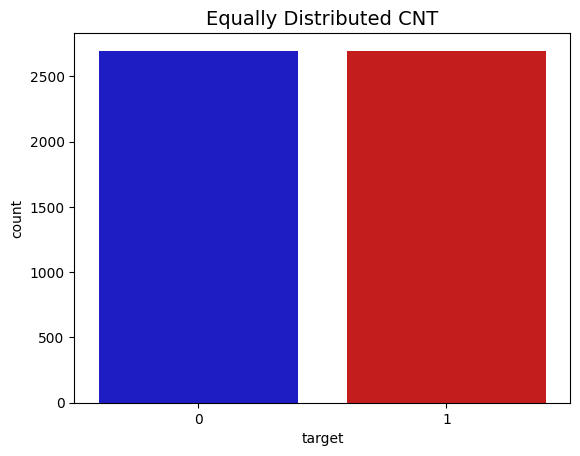

In [57]:
print('Distribution of the CNT in the subsample dataset')
print(sub_df['target'].value_counts()/len(sub_df))

sns.countplot(x ='target', data=sub_df, palette=colors)
plt.title('Equally Distributed CNT', fontsize=14)
plt.show()

### > Undersampling
- 많은 데이터 레이블을 가진 데이터셋을 적은 레이블의 데이터셋 수준으로  감소시킴

In [58]:
X = sub_df.drop('target', axis=1)
y = sub_df['target']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [61]:
classifier = { "KNearest": KNeighborsClassifier() }

In [62]:
for key, classifier in classifier.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifier:  KNeighborsClassifier Has a training score of 74.0 % accuracy score


#### > K-Nearest 모델에 대한 하이퍼 파라미터 탐색

In [63]:
# K-Nearest Neighbor
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

print('최적 하이퍼 파라미터: ', grid_knears.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_knears.best_score_))

최적 하이퍼 파라미터:  {'algorithm': 'auto', 'n_neighbors': 3}
최고 예측 정확도: 0.7422


In [64]:
# undersampling한 모델 알고리즘 평가 - f1 score

knears_score = cross_val_score(knears_neighbors, X_train, y_train, scoring="f1", cv=5)
print('Knears Neighbors F1 Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

Knears Neighbors F1 Score 75.16%


In [65]:
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

#### > roc_curve 그래프

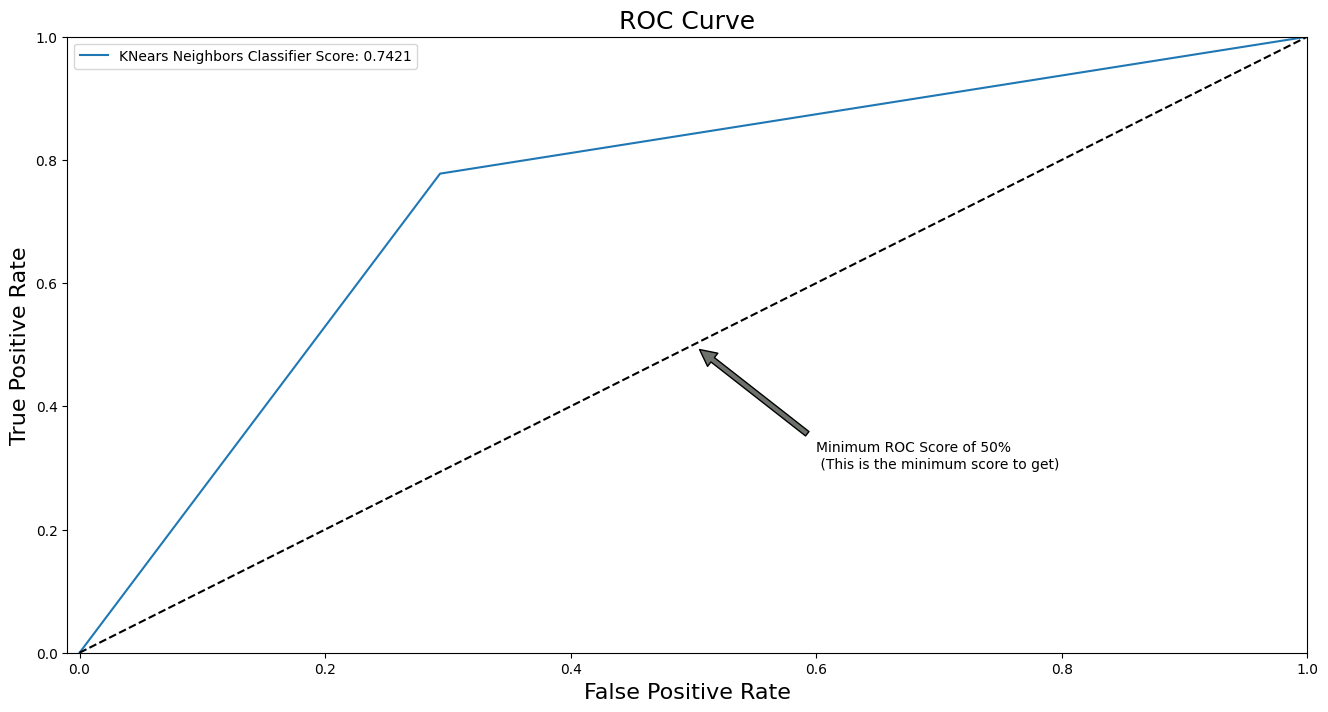

In [66]:
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)

def graph_roc_curve_multiple(knear_fpr, knear_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(knear_fpr, knear_tpr)
plt.show()

## 6. 모델 예측 결과 및 답안 작성

#### >> 12월을 제외한 1~11월까지 말일 데이터 프레임 생성 (초기 데이터셋에서 12월달에 오류가 있음)

In [67]:
# 예측 결과
results = []

# 해당 날짜들
Pred_Dates = [20210131 , 20210228 , 20210331 , 20210430 , 20210531 , 20210630 , 20210731 , 20210831 , 20210930 , 20211031 , 20211130]

# 사고 유형 (0 ~ 15)
Acdnt = [i for i in range(16)]

# 격자들
Grid_IDs = DF_t["GRID_ID"].unique()
Inputs = []
for date in Pred_Dates:
    grid_id_lst = []

    for acdnt in Acdnt :
        for grid_id in Grid_IDs:

                # 날짜로부터 년/월/일 계산
            date = date
            year = int(date/10000)
            month = int(date%10000/100)
            day = int(date%10000%100)
            input = [grid_id]
            input += [date, month, day, acdnt]
            Inputs.append(input)

    last_df = pd.DataFrame(data=Inputs , 
                             columns=['GRID_ID', 'OCRN_YMD', 'MONTH', 'DAY', 'ACDNT_type'])
    
last_df['OCRN_YMD'] = toDatetime(last_df['OCRN_YMD'])
last_df

,GRID_ID,OCRN_YMD,MONTH,DAY,ACDNT_type
0,400525,2021-01-31,1,31,0
1,392511,2021-01-31,1,31,0
2,393523,2021-01-31,1,31,0
3,403516,2021-01-31,1,31,0
4,398537,2021-01-31,1,31,0
...,...,...,...,...,...
83595,389528,2021-11-30,11,30,15
83596,382523,2021-11-30,11,30,15
83597,380516,2021-11-30,11,30,15
83598,393540,2021-11-30,11,30,15


In [69]:
## 격자내 아동,노인 인구 지수 column 추가
## - > 같은 달의 지난 3주간 인구 지수의 평균값으로 계산
OLD_HUM = []
CHLD_HUM = []
df1 = pd.DataFrame()

for m in range(1,12):
    for a in range(16):
        for g in last_df['GRID_ID'].unique():
            df1 = pd.concat([df1, DF2[(DF2.GRID_ID==g) & (DF2.MONTH==m) & (DF2.ACDNT_type == a)]], axis=0)
            OLD_HUM.append(df1['OLD_HUM'].mean())
            CHLD_HUM.append(df1['CHLD_HUM'].mean())

In [70]:
fp_df = pd.DataFrame({'OLD_HUM' : OLD_HUM, 'CHLD_HUM' : CHLD_HUM})
fp_df

,OLD_HUM,CHLD_HUM
0,1829.652333,1498.449333
1,977.446500,753.760167
2,735.284333,521.743333
3,719.329783,510.413043
4,545.556066,385.902459
...,...,...
83595,856.363083,463.207117
83596,856.363083,463.207117
83597,856.363083,463.207117
83598,856.363083,463.207117


In [71]:
fp_df.isnull().sum()

OLD_HUM     0
CHLD_HUM    0
dtype: int64

In [72]:
fp_df.to_csv('./fp_df.csv', index=False, encoding='cp949')

In [73]:
fp_df = pd.read_csv("./fp_df.csv")

In [74]:
last_df = pd.concat([last_df, fp_df], axis = 1)
last_df

,GRID_ID,OCRN_YMD,MONTH,DAY,ACDNT_type,OLD_HUM,CHLD_HUM
0,400525,2021-01-31,1,31,0,1829.652333,1498.449333
1,392511,2021-01-31,1,31,0,977.446500,753.760167
2,393523,2021-01-31,1,31,0,735.284333,521.743333
3,403516,2021-01-31,1,31,0,719.329783,510.413043
4,398537,2021-01-31,1,31,0,545.556066,385.902459
...,...,...,...,...,...,...,...
83595,389528,2021-11-30,11,30,15,856.363083,463.207117
83596,382523,2021-11-30,11,30,15,856.363083,463.207117
83597,380516,2021-11-30,11,30,15,856.363083,463.207117
83598,393540,2021-11-30,11,30,15,856.363083,463.207117


In [76]:
last_climate = pd.read_csv('./last_climate.csv')
last_climate

,OCRN_YMD,Precipitation
0,2021-01-31,NaN
1,2021-02-28,0.0
2,2021-03-31,NaN
3,2021-04-30,12.9
4,2021-05-31,19.8
5,2021-06-30,13.1
6,2021-07-31,0.3
7,2021-08-31,32.8
8,2021-09-30,NaN
9,2021-10-31,0.7


In [77]:
last_climate['Precipitation'].fillna(0, inplace=True)

In [78]:
last_climate['OCRN_YMD'] = toDatetime(last_climate['OCRN_YMD'])
last_df = pd.merge(last_df, last_climate, on = ['OCRN_YMD'])
last_df

,GRID_ID,OCRN_YMD,MONTH,DAY,ACDNT_type,OLD_HUM,CHLD_HUM,Precipitation
0,400525,2021-01-31,1,31,0,1829.652333,1498.449333,0.0
1,392511,2021-01-31,1,31,0,977.446500,753.760167,0.0
2,393523,2021-01-31,1,31,0,735.284333,521.743333,0.0
3,403516,2021-01-31,1,31,0,719.329783,510.413043,0.0
4,398537,2021-01-31,1,31,0,545.556066,385.902459,0.0
...,...,...,...,...,...,...,...,...
83595,389528,2021-11-30,11,30,15,856.363083,463.207117,21.7
83596,382523,2021-11-30,11,30,15,856.363083,463.207117,21.7
83597,380516,2021-11-30,11,30,15,856.363083,463.207117,21.7
83598,393540,2021-11-30,11,30,15,856.363083,463.207117,21.7


In [79]:
last_df

,GRID_ID,OCRN_YMD,MONTH,DAY,ACDNT_type,OLD_HUM,CHLD_HUM,Precipitation
0,400525,2021-01-31,1,31,0,1829.652333,1498.449333,0.0
1,392511,2021-01-31,1,31,0,977.446500,753.760167,0.0
2,393523,2021-01-31,1,31,0,735.284333,521.743333,0.0
3,403516,2021-01-31,1,31,0,719.329783,510.413043,0.0
4,398537,2021-01-31,1,31,0,545.556066,385.902459,0.0
...,...,...,...,...,...,...,...,...
83595,389528,2021-11-30,11,30,15,856.363083,463.207117,21.7
83596,382523,2021-11-30,11,30,15,856.363083,463.207117,21.7
83597,380516,2021-11-30,11,30,15,856.363083,463.207117,21.7
83598,393540,2021-11-30,11,30,15,856.363083,463.207117,21.7


In [80]:
### 파생변수 scaling

last_df['OLD_HUM'] = minmax_scaler.fit_transform(last_df['OLD_HUM'].values.reshape(-1,1))
last_df['CHLD_HUM'] = minmax_scaler.fit_transform(last_df['CHLD_HUM'].values.reshape(-1,1))
last_df['Precipitation'] = minmax_scaler.fit_transform(last_df['Precipitation'].values.reshape(-1,1))

In [81]:
last_df = last_df.drop(columns = 'OCRN_YMD')
last_df

,GRID_ID,MONTH,DAY,ACDNT_type,OLD_HUM,CHLD_HUM,Precipitation
0,400525,1,31,0,0.541911,0.876465,0.000000
1,392511,1,31,0,0.209542,0.327120,0.000000
2,393523,1,31,0,0.115096,0.155965,0.000000
3,403516,1,31,0,0.108874,0.147607,0.000000
4,398537,1,31,0,0.041100,0.055758,0.000000
...,...,...,...,...,...,...,...
83595,389528,11,30,15,0.162318,0.112784,0.661585
83596,382523,11,30,15,0.162318,0.112784,0.661585
83597,380516,11,30,15,0.162318,0.112784,0.661585
83598,393540,11,30,15,0.162318,0.112784,0.661585


In [82]:
# 최종적으로 답안에 작성 할 데이터 프레임 생성
last_df = last_df[['GRID_ID', 'MONTH', 'DAY', 'Precipitation', 'OLD_HUM', 'CHLD_HUM', 'ACDNT_type']]
last_df

,GRID_ID,MONTH,DAY,Precipitation,OLD_HUM,CHLD_HUM,ACDNT_type
0,400525,1,31,0.000000,0.541911,0.876465,0
1,392511,1,31,0.000000,0.209542,0.327120,0
2,393523,1,31,0.000000,0.115096,0.155965,0
3,403516,1,31,0.000000,0.108874,0.147607,0
4,398537,1,31,0.000000,0.041100,0.055758,0
...,...,...,...,...,...,...,...
83595,389528,11,30,0.661585,0.162318,0.112784,15
83596,382523,11,30,0.661585,0.162318,0.112784,15
83597,380516,11,30,0.661585,0.162318,0.112784,15
83598,393540,11,30,0.661585,0.162318,0.112784,15


In [83]:
# kneighborsclassifier 모델 적용하여 예측
pred_val = knears_neighbors.predict(last_df) 
unique, counts = np.unique(pred_val,return_counts = True)
uniq_cnt_dict=dict(zip(unique, counts))
uniq_cnt_dict

{0: 58434, 1: 25166}

In [84]:
pred_pro_val = knears_neighbors.predict_proba(last_df) 
pred_pro_val

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       ...,
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333]])

In [85]:
# K-Nearest Neighbor 모델로 매월 말일 사고유형별 사고발생 격자 예측

# 답안지에 적을 데이터
Results = []

# 달
Month = [i for i in range(1,12)]

#사고 유형 0 ~ 15
Acdnt = [i for i in range(16)]

# 격자들
Grid_IDs = DF2["GRID_ID"].unique()

grid_id_lst = []
for month in Month:
    
    for acdnt in Acdnt:
        predict_df=last_df.loc[(last_df['MONTH'] == month) & (last_df['ACDNT_type'] == acdnt),:]
            # 예측값들
        pred_val = knears_neighbors.predict_proba(predict_df) 
        pred_val_df = pd.DataFrame(pred_val)
        index=pred_val_df[pred_val_df[1]==pred_val_df[1].max()].index

            #해당날짜에 데이터 추가
        print([month, acdnt])
        print(Grid_IDs[index])

[1, 0]
[378513 380520 381520 382521 385519 390537 392511 392529 392534 393522
 393530 394525 395526 395534 398529 399524 399525 399526 399529 403538
 405537 380518 386531 380517 398521 402523 389528 404515 384530]
[1, 1]
[378513 380520 381520 382521 385519 390537 392511 392529 392534 393522
 393530 394525 395526 395534 398529 398533 399524 399525 399526 399529
 403538 405537 380518 386531 380517 398521 402523 389528 404515 384530]
[1, 2]
[378513 380520 381520 382521 385519 390537 392511 392529 392534 393522
 393530 394525 395526 395534 398529 398533 399524 399525 399526 399529
 403538 405537 380518 386531 380517 398521 402523 389528 404515 384530]
[1, 3]
[378513 380520 381520 382521 385519 390537 392511 392529 392534 393522
 393530 394525 395526 395534 397534 398529 398533 399524 399525 399526
 399529 403538 405537 380518 386531 380517 398521 402523 389528 404515
 384530]
[1, 4]
[378513 380520 381520 382521 385519 392511 392529 392534 393522 393530
 394525 395526 395534 397534 398529 3

[5, 4]
[378513 380520 381520 382521 385519 390526 390528 391519 391534 392511
 392529 392534 393522 393530 394529 394534 395526 395533 395534 397534
 398533 399524 399525 399526 399529 399531 403538 405537 385533 402537
 403513 380518 380517 398521 402523 389528 404515 384530]
[5, 5]
[378513 380520 381520 382521 385519 390526 390528 391519 391534 392511
 392529 392534 393522 393530 394520 394529 394534 395526 395533 395534
 397534 398533 399524 399525 399526 399529 399531 403538 405537 385533
 402537 403513 380518 380517 398521 402523 389528 404515 384530]
[5, 6]
[378513 380520 381520 382521 385519 390526 390528 390529 391519 391534
 392511 392529 392534 393522 393530 394520 394529 394534 395526 395533
 395534 397534 398533 399524 399525 399526 399529 399531 403538 405537
 385533 402537 403513 380518 380517 398521 402523 389528 404515 384530]
[5, 7]
[378513 380520 381520 382521 385519 390526 390528 390529 391519 391534
 392511 392529 392534 393522 393530 394520 394529 394534 395526 395

[9, 11]
[379528 380520 381520 382521 385519 386526 389531 390522 390526 391525
 391534 392521 392529 392534 393531 393534 394520 394521 394529 395526
 395533 395534 397527 397529 397534 398526 398527 398532 399524 399525
 399526 399528 399529 399531 405537 408515 378512 385533 402537 380518
 386531 384519 404518 380517 384517 391524 383518 380521 388519 398521
 382527 383529 402523 389528 404515 384530]
[9, 12]
[379528 380520 381520 382521 385519 386526 389531 390522 390526 391525
 391534 392521 392525 392529 392534 393531 393534 394520 394521 394529
 395526 395533 395534 397527 397529 397534 398526 398527 398532 398533
 399524 399525 399526 399528 399529 399531 405537 408515 378512 382535
 385533 402537 380518 386531 384519 404518 380517 384517 391524 383518
 380521 388519 398521 382527 383529 402523 389528 404515 384530]
[9, 13]
[379528 380520 381520 382521 385519 386526 389531 390522 390526 391525
 391534 392511 392519 392521 392525 392529 392534 393531 393534 394520
 394521 394529 